In [1]:
import datetime
import pandas as pd
import numpy as np

We are going to transform weather and electric load data to timeseries format, where each row represents a datetime with 1h granularity.

# Electric Load

In [2]:
load_data=pd.read_excel('Total_Load_20180601_20210630.xlsx') # This is the file we downloaded from ENTSO-e transparency plattform

# https://transparency.entsoe.eu/load-domain/r2/totalLoadR2/show?name=&defaultValue=false&viewType=TABLE&areaType=CTY&atch=false&dateTime.dateTime=22.07.2021+00:00|CET|DAY&biddingZone.values=CTY|10YGR-HTSO-----Y!CTY|10YGR-HTSO-----Y&dateTime.timezone=CET_CEST&dateTime.timezone_input=CET+(UTC+1)+/+CEST+(UTC+2)
load_data.head(48)

,Time,Load
0,01.06.2018 00:00 - 01.06.2018 01:00,5047.0
1,01.06.2018 01:00 - 01.06.2018 02:00,4696.0
2,01.06.2018 02:00 - 01.06.2018 03:00,4560.0
3,01.06.2018 03:00 - 01.06.2018 04:00,4482.0
4,01.06.2018 04:00 - 01.06.2018 05:00,4465.0
5,01.06.2018 05:00 - 01.06.2018 06:00,4519.0
6,01.06.2018 06:00 - 01.06.2018 07:00,4636.0
7,01.06.2018 07:00 - 01.06.2018 08:00,5187.0
8,01.06.2018 08:00 - 01.06.2018 09:00,5871.0
9,01.06.2018 09:00 - 01.06.2018 10:00,6257.0


In [3]:
load_data['Time']=load_data['Time'].apply(lambda x: x.split(' -')[0]) # keep the first part of the date before '-'
load_data=load_data.drop_duplicates(subset=['Time'],keep='first') # in case there are duplicate dates
load_data

,Time,Load
0,01.06.2018 00:00,5047.0
1,01.06.2018 01:00,4696.0
2,01.06.2018 02:00,4560.0
3,01.06.2018 03:00,4482.0
4,01.06.2018 04:00,4465.0
...,...,...
27022,30.06.2021 19:00,8607.0
27023,30.06.2021 20:00,8382.0
27024,30.06.2021 21:00,8479.0
27025,30.06.2021 22:00,8216.0


In [4]:
def to_date(df_row):
    date_time_str = df_row
    date_time_obj = datetime.datetime.strptime(df_row, '%d.%m.%Y %H:%M') # convert string to datetime
    return(date_time_obj)


load_data['Time']=load_data['Time'].apply(to_date)
load_data=load_data.sort_values(by='Time')

In [5]:
load_data.set_index(pd.DatetimeIndex(load_data.Time),inplace=True)
# in case there is no 1-hour granularity, resample per hour and forward fill missing hours
load_data=load_data.resample('H').pad()
load_data.Time = load_data.index.values
load_data=load_data.ffill(axis = 0)
load_data=load_data.reset_index(drop=True)
load_data

,Time,Load
0,2018-06-01 00:00:00,5047.0
1,2018-06-01 01:00:00,4696.0
2,2018-06-01 02:00:00,4560.0
3,2018-06-01 03:00:00,4482.0
4,2018-06-01 04:00:00,4465.0
...,...,...
27019,2021-06-30 19:00:00,8607.0
27020,2021-06-30 20:00:00,8382.0
27021,2021-06-30 21:00:00,8479.0
27022,2021-06-30 22:00:00,8216.0


In [6]:
# load_data.to_excel('Actual_load.xlsx',header=True,index=False) # export to excel

# Weather Data

In [7]:
# Join Athens and Thessaloniki weather timeseries
weather_athens=pd.read_excel('weather_timeseries_Athens.xlsx')
weather_thess=pd.read_excel('weather_timeseries_Thessaloniki.xlsx')

weather_timeseries = pd.merge(weather_athens, 
                            weather_thess, 
                            on='Date',
                            how='inner')

weather_timeseries.rename(columns={'Temperature_x': 'Temperature_Athens', 'Wind_x': 'Wind_Athens',
                                  'Humidity_x': 'Humidity_Athens', 'Temperature_y': 'Temperature_Thessaloniki',
                                  'Wind_y': 'Wind_Thessaloniki', 'Humidity_y': 'Humidity_Thessaloniki'}, inplace=True)

weather_timeseries = weather_timeseries[["Date", "Temperature_Athens", "Wind_Athens", "Humidity_Athens",
                                        "Temperature_Thessaloniki", "Wind_Thessaloniki", "Humidity_Thessaloniki"]]
weather_timeseries

,Date,Temperature_Athens,Wind_Athens,Humidity_Athens,Temperature_Thessaloniki,Wind_Thessaloniki,Humidity_Thessaloniki
0,2018-06-01 00:00:00,21.5,2.5,30.0,19.0,1.0,66.0
1,2018-06-01 01:00:00,20.0,2.0,33.0,19.0,1.0,68.0
2,2018-06-01 02:00:00,19.0,2.0,36.0,19.0,1.0,64.0
3,2018-06-01 03:00:00,21.0,2.5,32.0,17.0,1.5,73.0
4,2018-06-01 04:00:00,20.5,1.0,34.0,16.5,1.5,75.0
...,...,...,...,...,...,...,...
27019,2021-06-30 19:00:00,31.0,1.0,41.0,31.0,3.0,49.0
27020,2021-06-30 20:00:00,31.0,0.0,43.5,30.0,3.0,57.0
27021,2021-06-30 21:00:00,30.0,1.0,42.0,29.5,2.5,62.5
27022,2021-06-30 22:00:00,29.5,3.0,37.0,28.0,2.0,66.0


In [8]:
# Concat the weather data with the load data for all the years
load_data.columns=['Date','Load']
timeseries_data = pd.merge(load_data, 
               weather_timeseries, 
               on='Date',
               how='left')
timeseries_data

,Date,Load,Temperature_Athens,Wind_Athens,Humidity_Athens,Temperature_Thessaloniki,Wind_Thessaloniki,Humidity_Thessaloniki
0,2018-06-01 00:00:00,5047.0,21.5,2.5,30.0,19.0,1.0,66.0
1,2018-06-01 01:00:00,4696.0,20.0,2.0,33.0,19.0,1.0,68.0
2,2018-06-01 02:00:00,4560.0,19.0,2.0,36.0,19.0,1.0,64.0
3,2018-06-01 03:00:00,4482.0,21.0,2.5,32.0,17.0,1.5,73.0
4,2018-06-01 04:00:00,4465.0,20.5,1.0,34.0,16.5,1.5,75.0
...,...,...,...,...,...,...,...,...
27019,2021-06-30 19:00:00,8607.0,31.0,1.0,41.0,31.0,3.0,49.0
27020,2021-06-30 20:00:00,8382.0,31.0,0.0,43.5,30.0,3.0,57.0
27021,2021-06-30 21:00:00,8479.0,30.0,1.0,42.0,29.5,2.5,62.5
27022,2021-06-30 22:00:00,8216.0,29.5,3.0,37.0,28.0,2.0,66.0


In [9]:
# timeseries_data.to_excel('all_data.xlsx',header=True,index=False) # export to excel

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
from workalendar.europe import Greece

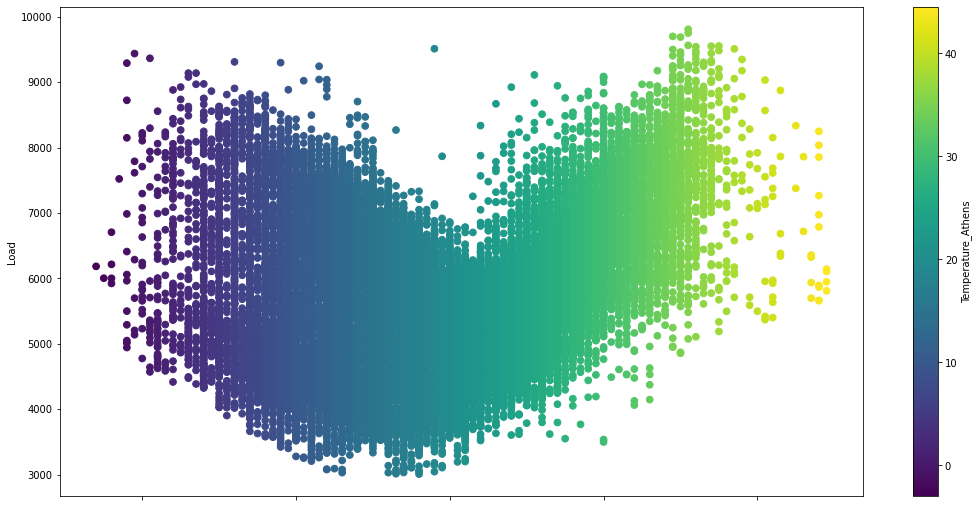

In [11]:
ax1 = timeseries_data.plot.scatter(x='Temperature_Athens',
                      y='Load',
                      c='Temperature_Athens',
                      colormap='viridis',s=45,figsize=(18, 9))

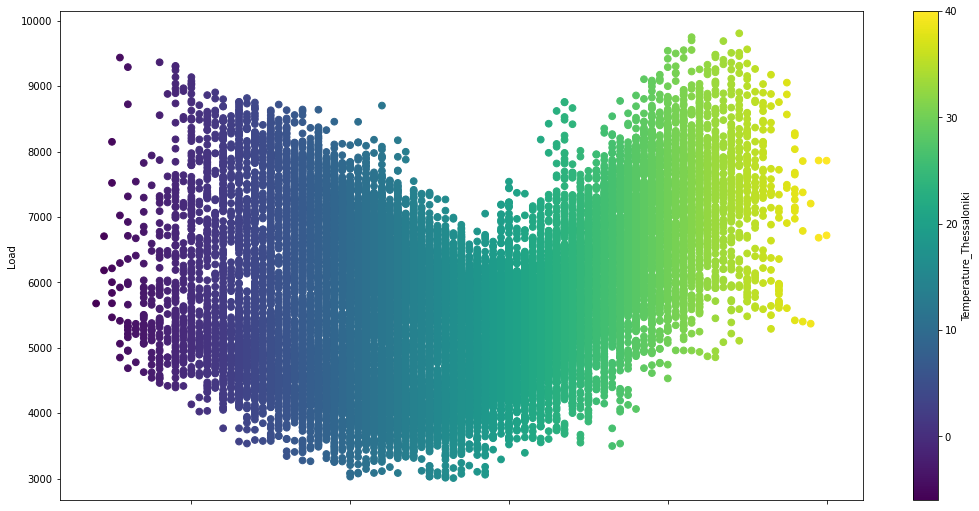

In [12]:
ax1 = timeseries_data.plot.scatter(x='Temperature_Thessaloniki',
                      y='Load',
                      c='Temperature_Thessaloniki',
                      colormap='viridis',s=45,figsize=(18, 9))